# Tema 3: Evaluación de algortimos de clasificación
## Cuaderno de ejercicios
### realizado por Ángela Cristina Villate


**Ejercicio 1**

Supongamos que hemos utilizado un clasificador, por ejemplo, Naive Bayes, para clasificar documentos con respecto al sentimiento. Las clases son Pos (positivo), Neg (negativo) y Neu (neutro). Probamos nuestro clasificador en 10 documentos para los que conocemos su _gold standar_ (clase real). La prueba tiene los siguientes resultados:

| Documento | Clase Real | Clase predicha |
| ------------- | ------------- | ------------- |
| d1  | Pos  | Pos |
| d2  | Pos  | Pos |
| d3  | Pos  | Pos |
| d4  | Pos  | Neu |
| d5  | Neg  | Neg |
| d6  | Neg  | Neu |
| d7  | Neg  | Neg |
| d8  | Neu  | Pos |
| d9  | Neu  | Neu |
| d10  | Neu  | Neu |

Calcular: precision, recall, accuracy y F1 para estos resultados de clasificación para las tres clases.

In [2]:
import pandas as pd

#Importing the dataset
data = pd.read_excel("DatosEjercicio.xlsx")
data

,Documento,Clase Real,Clase predicha
0,d1,Pos,Pos
1,d2,Pos,Pos
2,d3,Pos,Pos
3,d4,Pos,Neu
4,d5,Neg,Neg
5,d6,Neg,Neu
6,d7,Neg,Neg
7,d8,Neu,Pos
8,d9,Neu,Neu
9,d10,Neu,Neu


In [4]:
#haremos uso de la librería Skelarn y la instalamos 

In [5]:
!pip install -U scikit-learn

     ---------------------------------------- 9.3/9.3 MB 924.5 kB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


### Visualización de resultados

In [11]:
### llamamos las librerías de visualización

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [15]:
## Calculamos la matriz de confusión
mc= confusion_matrix(data['Clase Real'], data['Clase predicha'])
mc

array([[2, 1, 0],
       [0, 2, 1],
       [0, 1, 3]], dtype=int64)

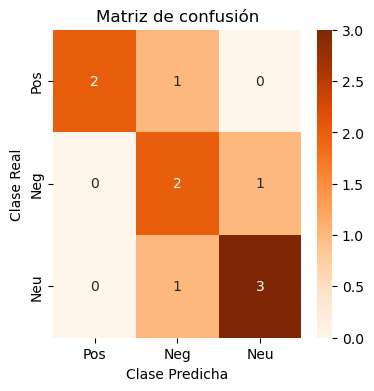

In [50]:
plt.figure(figsize=(4,4))
sns.heatmap(mc, annot=True, fmt='g', cmap='Oranges', xticklabels=["Pos", "Neg", "Neu"], yticklabels=["Pos", "Neg", "Neu"])
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de confusión')
plt.show()

### Cálculo del accuracy
##### Debido a que ya tenemos el clasificador y el objetivo es evaluar las predicciones, no es necesario dividir los datos en train y test. Como el accuracy se calcula directamente no hay necesidad de hacer ponderación por cada una de las clases


In [7]:
### llamamos la función de cálculo del accuracy
from sklearn.metrics import accuracy_score


In [35]:
accuracy1 = accuracy_score(data["Clase Real"], data["Clase predicha"])
accuracy1
                  

0.7

### Cálculo de recall
##### El recall si necesita ponderación, por eso incluímos el average con weighted porque es multiclase (esta función es nueva para mi) en el siguiente enlace la explicación https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.metrics.recall_score.html

In [44]:
from sklearn.metrics import recall_score

In [31]:
recall_pos= recall_score(data['Clase Real'], data['Clase predicha'], average= 'weighted', labels=["Pos"])
recall_neg = recall_score(data['Clase Real'], data['Clase predicha'], average='weighted', labels=["Neg"])
recall_neu = recall_score(data['Clase Real'], data['Clase predicha'], average='weighted', labels=["Neu"])




#### se usa el parámetro average debido a que hay desproporción en el conjunto de datos entre neutros, positivos y negativos

In [47]:
print(f"Recall Positivo: {recall_pos:.1%}")
print(f"Recall Negativo: {recall_neg:.1%}")
print(f"Recall Neutro: {recall_neu:.1%}")

Recall Positivo: 75.0%
Recall Negativo: 66.7%
Recall Neutro: 66.7%


### Cálculo de precisión (ponderada)

In [29]:
from sklearn.metrics import precision_score

In [48]:
from sklearn.metrics import precision_score
precision2 = precision_score(data["Clase Real"], data["Clase predicha"], average='weighted')
print(f"Precisión: {precision2:.1%}")

Precisión: 75.0%


### Cálculo de f1 Score

In [38]:
from sklearn.metrics import f1_score
f1 = f1_score(data["Clase Real"], data["Clase predicha"], average='weighted')
print(f"Puntuación F1: {f1:.2%}")


Puntuación F1: 71.14%


**Ejercicio 2**

Se evaluó un clasificador binario utilizando un conjunto de 1000 ejemplos de prueba (test) en los que el 50 % de todos los ejemplos son negativos. El clasificador tiene 60 % de sensitivity y 70 % de accuracy. Escribe la matriz de confusión.

In [65]:
from sklearn.metrics import confusion_matrix
sensibilidad = 0.60
accuracy= 0.70
total_ejemplos = 1000
porc_positivos= 0.50
cant_negativos= 500
cant_positivos =500

In [75]:
#De acuerdo con la información dada, para calcular la matriz de confusión hace fala calcular los VP, FP y los VN y los fN, para lo cual
# Para calcular los VP la medida de referencia es la sensibilidad
VP= sensibilidad*cant_positivos
print(f"Verdaderos Positivos: {VP:}")
FN= cant_positivos-VP
print(f"Falsos Negativos: {FN}")

#Para calcular los Verdaderos Negativos la medida de referencia es el accuracy
VN= accuracy*cant_negativos
print(f"Verdaderos Negativos: {VN}")

FP= cant_negativos-VN
print(f"Falsos positivos: {FP}")


Verdaderos Positivos: 300.0
Falsos Negativos: 200.0
Verdaderos Negativos: 350.0
Falsos positivos: 150.0


##### una vez calculados todos los datos, procedemos a crear la matriz de confusión con la función de sklearn, para ampliar información consultar https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html 


In [76]:
from sklearn.metrics import confusion_matrix
# indicaremos que los VP serán 1 y los FN serán 0
mx_cf= confusion_matrix([1]*int(VP)+[0]*int(FN)+[0]*int(VN)+[1]*int(FP),
                       [1]* cant_positivos+[0]*cant_negativos) 
mx_cf



array([[350, 200],
       [150, 300]], dtype=int64)

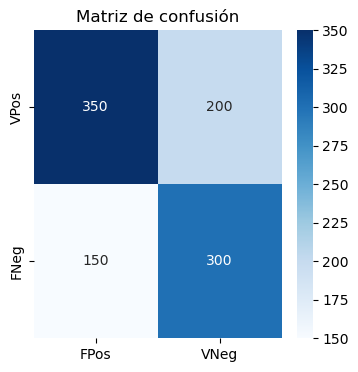

In [80]:
plt.figure(figsize=(4,4))
sns.heatmap(mx_cf, annot=True, fmt='g', cmap='Blues', xticklabels=["FPos", "V Neg"], yticklabels=["V Pos", "F Neg"])
plt.title('Matriz de confusión')
plt.show()

**Ejercicio 3**

Utilizando la matriz de confusión creada en el ejercicio anterior, calcula la precisión del clasificador, la medida F1 y
especificidad.

### Cálculo de medidas

### profe, hola, no sé cómo calcular los true y los predict, podrías darme una pista o indicarme dónde buscar, gracias 

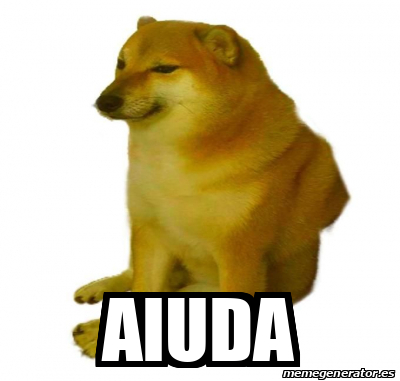


In [ ]:
y_true= 500
y_predict=350
x_true= 500
x_predict=300

In [ ]:
from sklearn.metrics import precision_score
precision3 = precision_score()
print(f"Precisión: {precision2:.1%}")